In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/DL/CNN/Pneumonia Detection using CNN

/content/drive/MyDrive/Colab Notebooks/DSCT/DL/CNN/Pneumonia Detection using CNN


In [3]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import tensorflow as tf
import os
import cv2
import random
from imutils import paths
from sklearn.preprocessing import LabelEncoder

In [7]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/DSCT/DL/CNN/Pneumonia Detection using CNN/Data Set/chest_xray/train"


2

#CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,ReLU,LeakyReLU,PReLU
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=90,    #rotate 5 degree
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(X)



In [ ]:
epochs=20
batch_size=18

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape[0]

4172

In [ ]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/20
131/131 [==============================] - 13s 25ms/step - loss: 0.3056 - accuracy: 0.8631 - val_loss: 1.9647 - val_accuracy: 0.7248 - lr: 0.0010
Epoch 2/20
131/131 [==============================] - 3s 21ms/step - loss: 0.2133 - accuracy: 0.9151 - val_loss: 2.7041 - val_accuracy: 0.7248 - lr: 0.0010
Epoch 3/20
129/131 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9206
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
131/131 [==============================] - 3s 20ms/step - loss: 0.2005 - accuracy: 0.9211 - val_loss: 1.7534 - val_accuracy: 0.7248 - lr: 0.0010
Epoch 4/20
131/131 [==============================] - 3s 20ms/step - loss: 0.1627 - accuracy: 0.9355 - val_loss: 1.6344 - val_accuracy: 0.7258 - lr: 3.0000e-04
Epoch 5/20
131/131 [==============================] - 3s 21ms/step - loss: 0.1436 - accuracy: 0.9425 - val_loss: 0.3284 - val_accuracy: 0.8696 - lr: 3.0000e-04
Epoch 6/20
131/131 [==============================

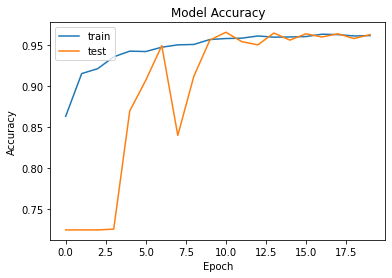

In [ ]:
# Graph Between ACC and Epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()


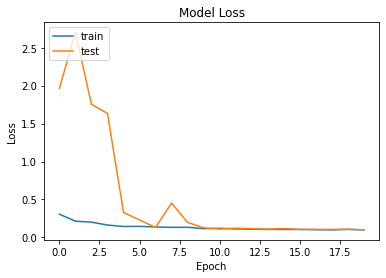

In [ ]:
# Graph Between Loss and Epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")

plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/DSCT/DL/CNN/Pneumonia Detection using CNN/Data Set/chest_xray/test",
    image_size=(32,32),
    batch_size=18,
    shuffle=False,
    labels='inferred',
    label_mode='binary',
    color_mode='rgb'

)


Found 624 files belonging to 2 classes.


In [ ]:
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
test_ds.class_names

['NORMAL', 'PNEUMONIA']

In [ ]:
model.evaluate(test_ds)

35/35 [==============================] - 35s 987ms/step - loss: 38.0000 - accuracy: 0.7853


[38.00002670288086, 0.7852563858032227]

#by using flow_from_directory

In [5]:
from keras.models import Sequential
from keras.layers import Dense,ReLU,LeakyReLU,PReLU
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# train_datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
#                            samplewise_center=False,  #set each sample mean to 0
#                            featurewise_std_normalization=False, #divide input datas to std
#                            samplewise_std_normalization=False,  #divide each datas to own std
#                            zca_whitening=False,  #dimension reduction
#                            rotation_range=90,    #rotate 5 degree
#                            horizontal_flip=False,  #randomly flip images
#                            vertical_flip=False,
#                            )

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/DSCT/DL/CNN/Pneumonia Detection using CNN/Data Set/chest_xray/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 5215 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [10]:
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1 , activation = 'sigmoid'))

model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.2, min_lr=0.000001)

In [12]:
history=model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator,
        callbacks = [learning_rate_reduction])

Epoch 1/20
163/163 [==============================] - 503s 3s/step - loss: 0.3943 - accuracy: 0.8608 - val_loss: 4.5861 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/20
163/163 [==============================] - 89s 547ms/step - loss: 0.1957 - accuracy: 0.9292 - val_loss: 8.7237 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/20
163/163 [==============================] - ETA: 0s - loss: 0.1737 - accuracy: 0.9373
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
163/163 [==============================] - 88s 537ms/step - loss: 0.1737 - accuracy: 0.9373 - val_loss: 4.7394 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/20
163/163 [==============================] - 84s 515ms/step - loss: 0.1330 - accuracy: 0.9557 - val_loss: 0.3148 - val_accuracy: 0.9054 - lr: 2.0000e-04
Epoch 5/20
163/163 [==============================] - 85s 523ms/step - loss: 0.1231 - accuracy: 0.9622 - val_loss: 0.2321 - val_accuracy: 0.9103 - lr: 2.0000e-04
Epoch 6/20
163/163 [======================

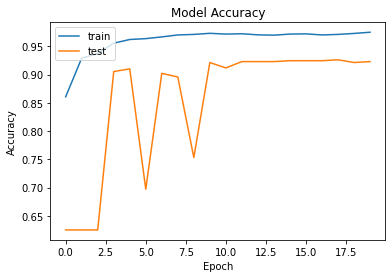

In [13]:
# Graph Between ACC and Epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()


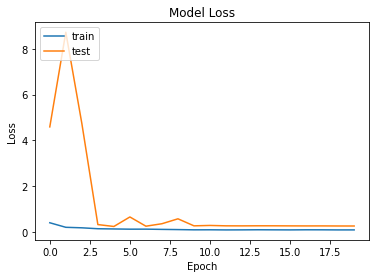

In [14]:
# Graph Between Loss and Epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")

plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/DSCT/DL/CNN/Pneumonia Detection using CNN/Data Set/chest_xray/test",
    image_size=(150,150),
    batch_size=32,
    shuffle=False,
    labels='inferred',
    label_mode='binary',
    color_mode='rgb'

)


Found 624 files belonging to 2 classes.


In [16]:
test_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [17]:
model.evaluate(test_ds)

20/20 [==============================] - 3s 136ms/step - loss: 5.1683 - accuracy: 0.6538


[5.168284893035889, 0.6538461446762085]

In [18]:
model.save("Pneumonia.h5")

#prediction

In [19]:
from keras.models import load_model
loaded_model = load_model("Pneumonia.h5")

In [20]:
pred_dir='/content/drive/MyDrive/Colab Notebooks/DSCT/DL/CNN/Pneumonia Detection using CNN/Data Set/chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg'

In [21]:
X_pred=[]
X_pred.append(cv2.resize(cv2.cvtColor(cv2.imread(f'{pred_dir}'), cv2.COLOR_BGR2RGB), (150, 150)))

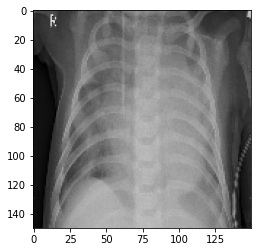

In [22]:
plt.imshow(X_pred[0])

In [26]:
X_pred = np.asarray(X_pred)
X_pred.shape

(1, 150, 150, 3)

In [ ]:
# {'NORMAL': 0, 'PNEUMONIA': 1}

In [28]:
prediction=loaded_model.predict(X_pred)

1/1 [==============================] - 0s 25ms/step


In [29]:
prediction

array([[1.]], dtype=float32)